In [1]:
%matplotlib inline

from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier

In [2]:
identifiers = [seq_record.id for seq_record in SeqIO.parse("NS5_protein_REF_ZIBRA_AFRICA.fas", "fasta")]
seqs = np.array([list(str(seq_rec.seq)) for seq_rec in SeqIO.parse("NS5_protein_REF_ZIBRA_AFRICA.fas", "fasta")])

df = pd.DataFrame(seqs, index=identifiers)
df

,0,1,2,3,4,5,6,7,8,9,...,828,829,830,831,832,833,834,835,836,837
KJ776791.2_Zika_virus_strain_H/PF/2013_complete_genome_French_Polynesia,V,S,R,G,S,A,K,L,R,W,...,M,D,Y,L,S,T,Q,V,R,Y
KX702400.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-1/2016_complete_genome_Venezuela,V,S,R,G,S,A,K,L,R,W,...,M,D,Y,L,S,T,Q,V,R,Y
KX893855.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-2/2016_complete_genome_Venezuela,V,S,R,G,S,A,K,L,R,W,...,M,D,Y,L,S,T,Q,V,R,Y
KU955593.1_Zika_virus_isolate_Zika_virus/H.sapiens-tc/KHM/2010/FSS13025_complete_genome_Cambodia,V,S,R,G,S,A,K,L,R,W,...,V,D,Y,L,S,T,Q,V,R,Y
ZIKV|KX421194|Nica2-16|Nicaragua|2016-01-13,V,S,R,G,S,A,K,L,R,W,...,M,D,Y,L,S,T,Q,V,R,Y
ZIKV|KY348640|SL1602|Suriname|2016-01-22,V,S,R,G,S,A,K,L,R,W,...,V,D,Y,L,S,T,Q,V,R,Y
ZIKV|KY272991|RIO-BM1|Brazil_Rio_de_Janeiro|2016-02-12,V,S,R,G,S,A,K,L,R,W,...,M,D,Y,L,S,T,Q,V,R,Y
ZIKV|KY328289|HN16|Honduras|2016-05-16,V,S,R,G,S,A,K,L,R,W,...,M,D,Y,L,S,T,Q,V,R,Y
ZIKV|KY120349|CIENI551|Mexico_Oaxaca_Tehuantepec_Isthmus|2016-03-03,V,S,R,G,S,A,K,L,R,W,...,M,D,Y,L,S,T,Q,V,R,Y
ZIKV|LC190723|ZIKV_Hu_Yokohama_1_2016|Japan_Kanagawa_Yokohama|2016-05-20,V,S,R,G,S,A,K,L,R,W,...,M,D,Y,L,S,T,Q,V,R,Y


In [6]:
df[817]

KJ776791.2_Zika_virus_strain_H/PF/2013_complete_genome_French_Polynesia                             V
KX702400.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-1/2016_complete_genome_Venezuela        V
KX893855.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-2/2016_complete_genome_Venezuela        V
KU955593.1_Zika_virus_isolate_Zika_virus/H.sapiens-tc/KHM/2010/FSS13025_complete_genome_Cambodia    M
ZIKV|KX421194|Nica2-16|Nicaragua|2016-01-13                                                         V
ZIKV|KY348640|SL1602|Suriname|2016-01-22                                                            V
ZIKV|KY272991|RIO-BM1|Brazil_Rio_de_Janeiro|2016-02-12                                              V
ZIKV|KY328289|HN16|Honduras|2016-05-16                                                              V
ZIKV|KY120349|CIENI551|Mexico_Oaxaca_Tehuantepec_Isthmus|2016-03-03                                 V
ZIKV|LC190723|ZIKV_Hu_Yokohama_1_2016|Japan_Kanagawa_Yokohama|2016-05-20          

In [7]:
Y = pd.read_csv("labels_1.csv", sep=";")
Y.index = Y["ID"]
Y = Y.drop(columns=["Unnamed: 0", "ID"])
Y

,Class
ID,
KJ776791.2_Zika_virus_strain_H/PF/2013_complete_genome_French_Polynesia,0
KX702400.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-1/2016_complete_genome_Venezuela,0
KX893855.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-2/2016_complete_genome_Venezuela,0
KU955593.1_Zika_virus_isolate_Zika_virus/H.sapiens-tc/KHM/2010/FSS13025_complete_genome_Cambodia,0
ZIKV|KX421194|Nica2-16|Nicaragua|2016-01-13,0
ZIKV|KY348640|SL1602|Suriname|2016-01-22,0
ZIKV|KY272991|RIO-BM1|Brazil_Rio_de_Janeiro|2016-02-12,0
ZIKV|KY328289|HN16|Honduras|2016-05-16,0
ZIKV|KY120349|CIENI551|Mexico_Oaxaca_Tehuantepec_Isthmus|2016-03-03,0


In [8]:
X = pd.get_dummies(df)
X

,0_-,0_V,1_-,1_S,2_-,2_R,3_-,3_G,4_-,4_S,...,833_-,833_T,834_-,834_Q,835_-,835_V,836_-,836_R,837_-,837_Y
KJ776791.2_Zika_virus_strain_H/PF/2013_complete_genome_French_Polynesia,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
KX702400.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-1/2016_complete_genome_Venezuela,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
KX893855.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-2/2016_complete_genome_Venezuela,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
KU955593.1_Zika_virus_isolate_Zika_virus/H.sapiens-tc/KHM/2010/FSS13025_complete_genome_Cambodia,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
ZIKV|KX421194|Nica2-16|Nicaragua|2016-01-13,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
ZIKV|KY348640|SL1602|Suriname|2016-01-22,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
ZIKV|KY272991|RIO-BM1|Brazil_Rio_de_Janeiro|2016-02-12,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
ZIKV|KY328289|HN16|Honduras|2016-05-16,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
ZIKV|KY120349|CIENI551|Mexico_Oaxaca_Tehuantepec_Isthmus|2016-03-03,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
ZIKV|LC190723|ZIKV_Hu_Yokohama_1_2016|Japan_Kanagawa_Yokohama|2016-05-20,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1


In [14]:
X['817_V']

KJ776791.2_Zika_virus_strain_H/PF/2013_complete_genome_French_Polynesia                             1
KX702400.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-1/2016_complete_genome_Venezuela        1
KX893855.1_Zika_virus_strain_Zika_virus/Homo_sapiens/VEN/UF-2/2016_complete_genome_Venezuela        1
KU955593.1_Zika_virus_isolate_Zika_virus/H.sapiens-tc/KHM/2010/FSS13025_complete_genome_Cambodia    0
ZIKV|KX421194|Nica2-16|Nicaragua|2016-01-13                                                         1
ZIKV|KY348640|SL1602|Suriname|2016-01-22                                                            1
ZIKV|KY272991|RIO-BM1|Brazil_Rio_de_Janeiro|2016-02-12                                              1
ZIKV|KY328289|HN16|Honduras|2016-05-16                                                              1
ZIKV|KY120349|CIENI551|Mexico_Oaxaca_Tehuantepec_Isthmus|2016-03-03                                 1
ZIKV|LC190723|ZIKV_Hu_Yokohama_1_2016|Japan_Kanagawa_Yokohama|2016-05-20          

In [ ]:
#dataset = pd.concat([X, Y], axis=1)
#dataset

# Beginning Classification

In [15]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, oob_score=True)

In [16]:
clf.fit(X, Y.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [18]:
len(clf.feature_importances_)

1765

In [19]:
print(clf.feature_importances_)
print("\n")


[1.38457536e-04 3.86720899e-05 1.04549894e-04 ... 4.76193078e-05
 2.24929675e-05 6.17423153e-05]




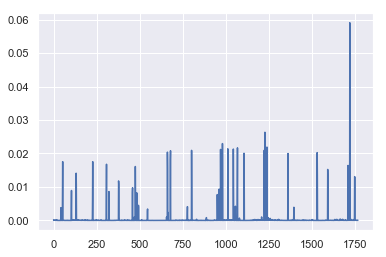

In [20]:
plt.plot(clf.feature_importances_, )

In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(clf)
explainer.shap_values

In [ ]:
shap_values = explainer.shap_values(X)
type(shap_values)
print(len(shap_values[0][0]))
shap_values
plt.plot(shap_values[0][0])
plt.plot(shap_values[0][15])

In [ ]:
explainer.expected_value

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][21], X.iloc[21,:])

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[1][0], X.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[1][21], X.iloc[21,:])

In [ ]:
x = np.array(X.iloc[12,:])
x = x.reshape(1, -1)



In [ ]:
clf.predict(x)

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X)

In [ ]:
shap.summary_plot(shap_values[0], X)

In [ ]:
shap.summary_plot(shap_values[0], X, plot_type="bar")

In [ ]:
shap.TreeExplainer(clf).shap_interaction_values(X)

In [ ]:
shap_interaction_values = shap.TreeExplainer(clf).shap_interaction_values(X)
len(shap_interaction_values)


In [ ]:
shap.summary_plot(shap_interaction_values[0], X)